In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import FileLink
import shutil

In [238]:
#Membaca file csv
file_path = 'D:\Tugas Akhir\Stroke\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
# Menampilkan jumlah data awal dataset sebelum diubah
jumlah_data_awal = df.shape[0]
print("Jumlah data awal sebelum perubahan:", jumlah_data_awal)
df = df.drop('id', axis=1)
df.head()

Jumlah data awal sebelum perubahan: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [239]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [240]:
# Menghapus baris dengan nilai 'other' pada kolom 'age'
df = df[df['gender'] != 'Other']

# Menghapus baris dengan nilai 'children' atau 'Never_worked' pada kolom 'work_type'
df = df[~df['work_type'].isin(['children', 'Never_worked'])]

# Menghapus baris dengan nilai bmi lebih dari 60 dan usia kurang dari 25
df = df[(df['bmi'] <= 60) & (df['age'] >= 25)]
jumlah_data_akhir = df.shape[0]
print("Jumlah data akhir setelah perubahan:", jumlah_data_akhir)
df.head()

Jumlah data akhir setelah perubahan: 3689


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


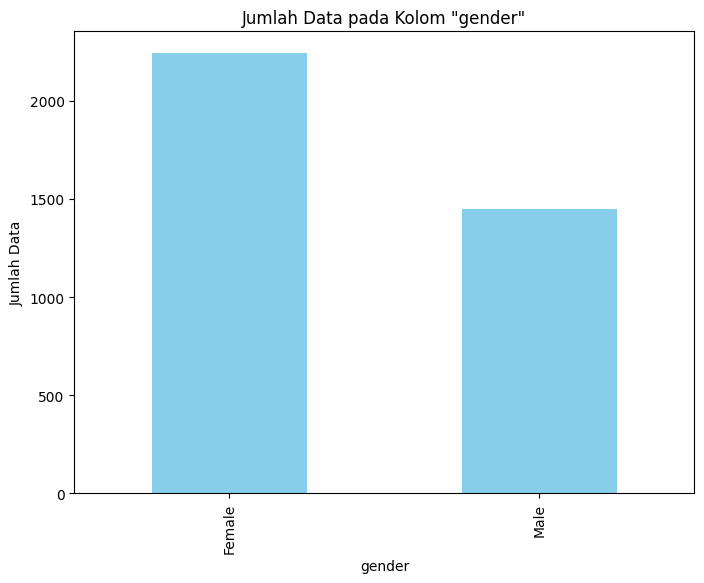

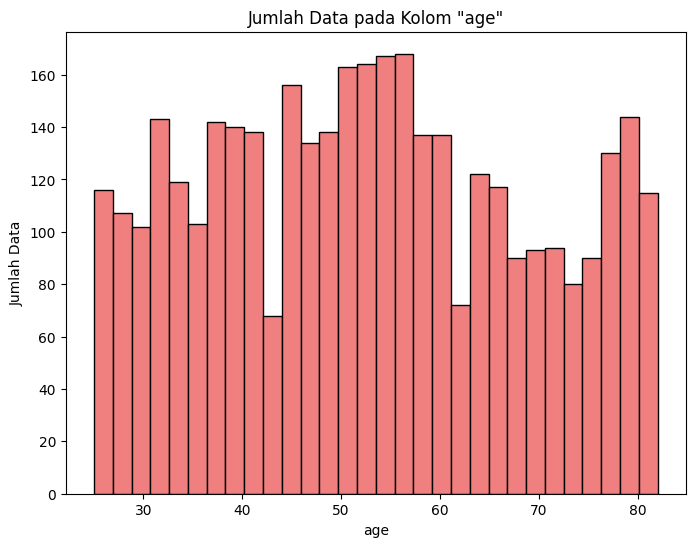

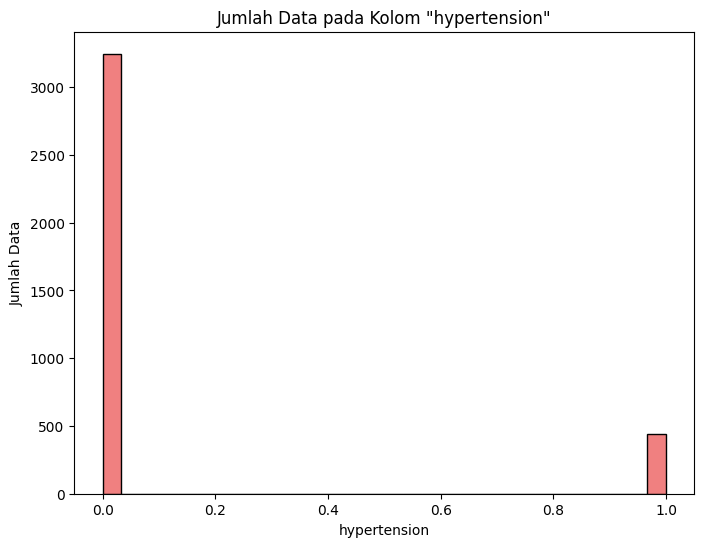

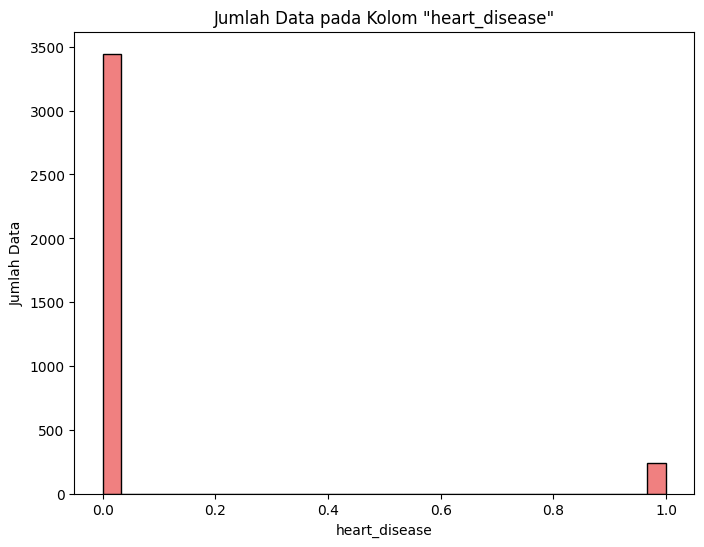

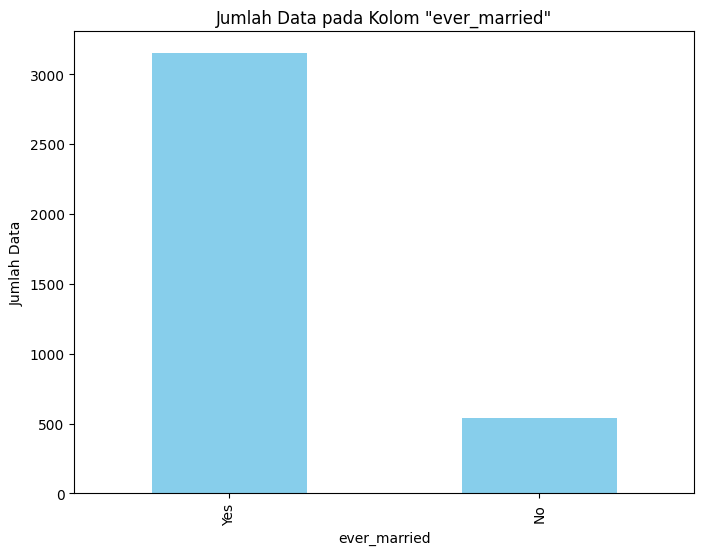

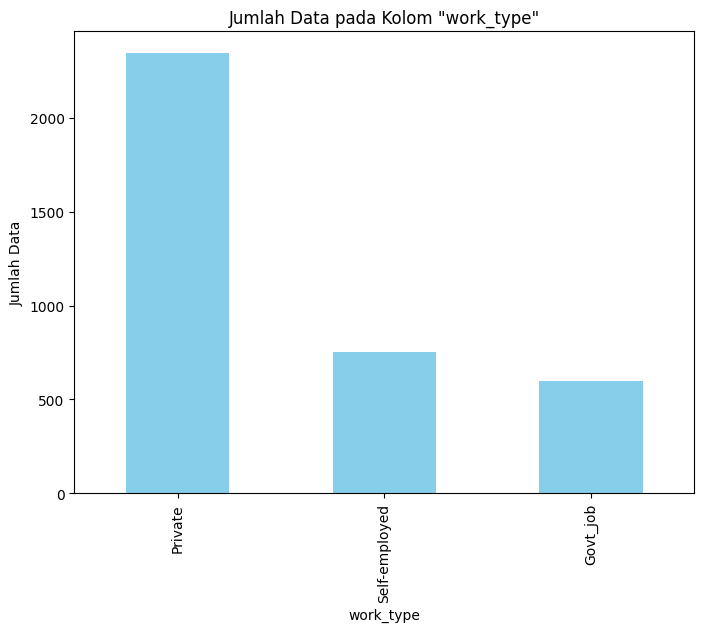

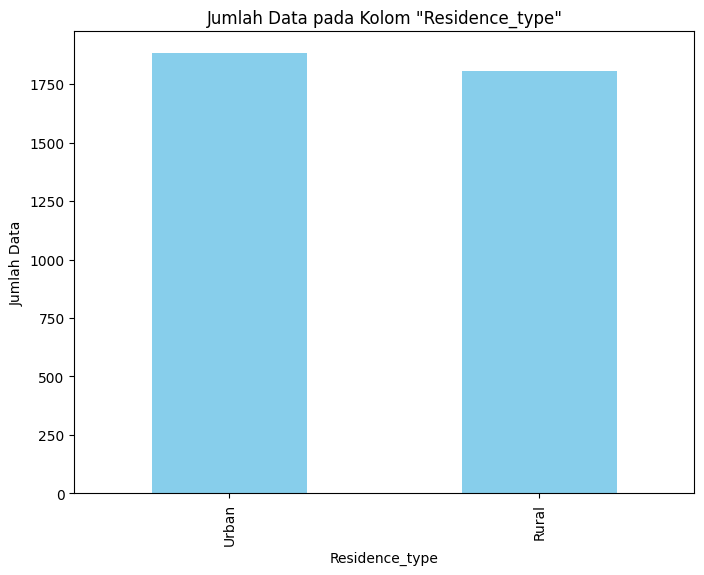

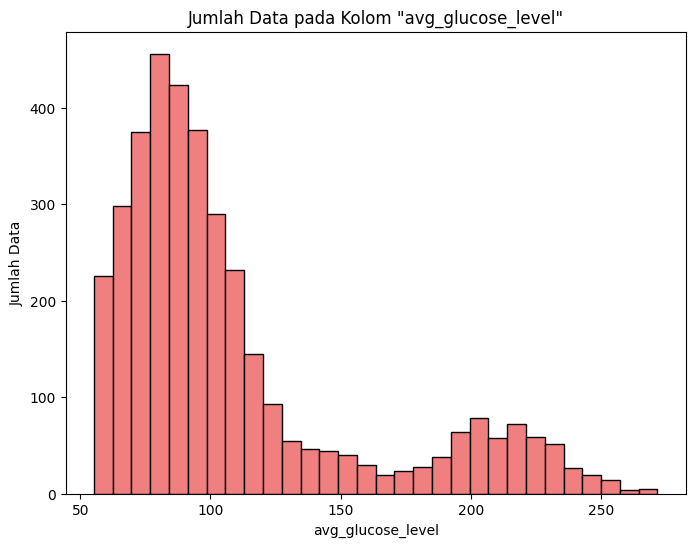

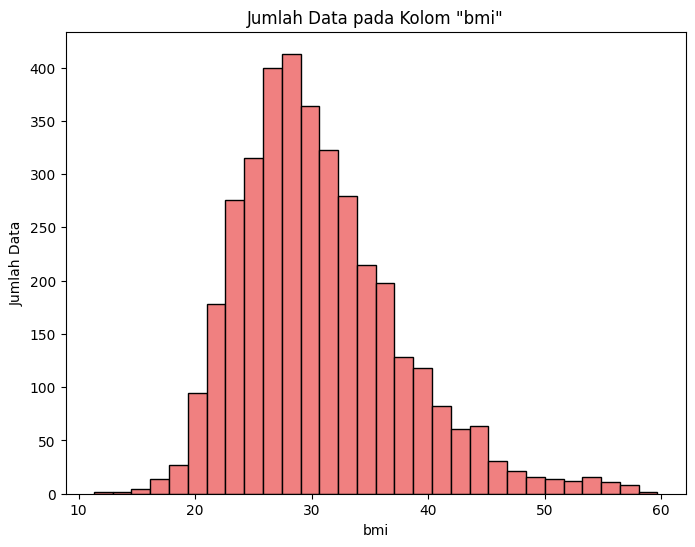

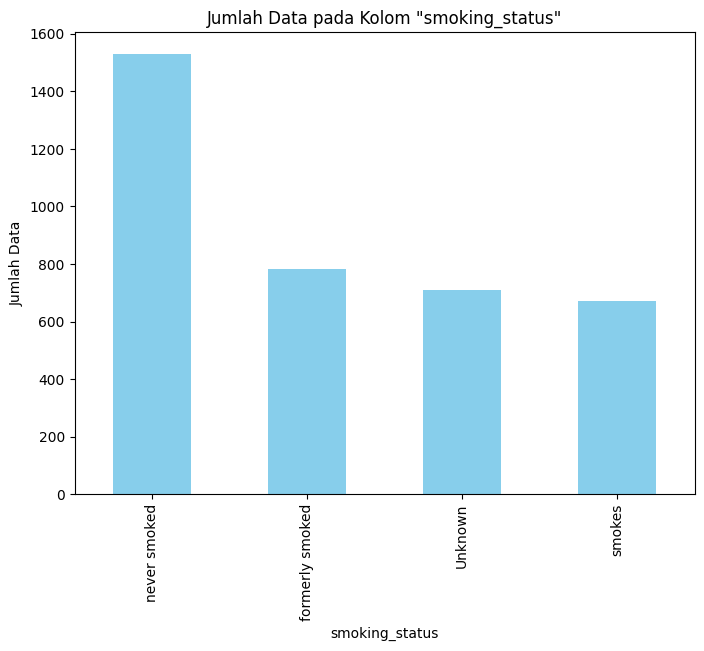

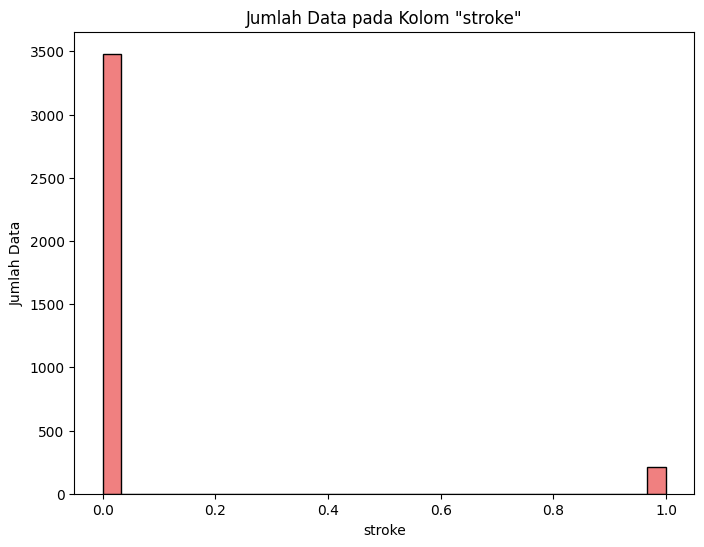

In [241]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

<Axes: >

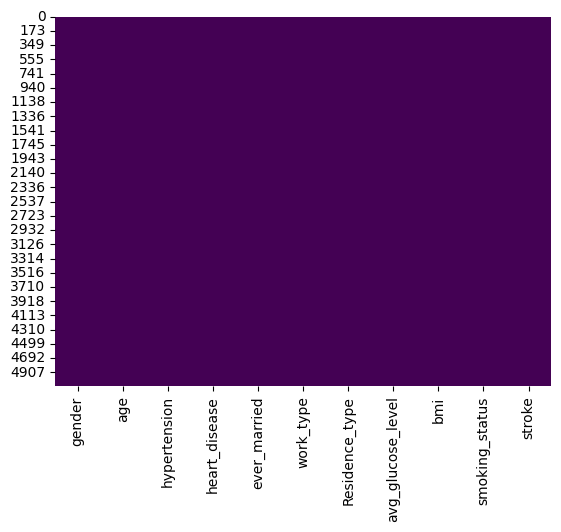

In [242]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [243]:
print(df['gender'].value_counts())
# Mengganti label 'male' menjadi 0 dan 'female' menjadi 1 pada kolom 'gender'
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

gender
Female    2242
Male      1447
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0       0  67.0             0              1          Yes        Private   
2       0  80.0             0              1          Yes        Private   
3       1  49.0             0              0          Yes        Private   
4       1  79.0             1              0          Yes  Self-employed   
5       0  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [244]:
print(df['ever_married'].value_counts())
# Mengganti label 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'ever_married'
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

ever_married
Yes    3148
No      541
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,Rural,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [245]:
print(df['Residence_type'].value_counts())
# Mengganti label 'Urban' dan 'Rural' menjadi 0 dan 1 pada kolom 'Residence_type'
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

Residence_type
Urban    1881
Rural    1808
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,1,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [246]:
# One-hot encoding untuk kolom 'work_type'
x_work_type = df['work_type'].values.reshape(-1, 1)
encoder_work_type = OneHotEncoder(sparse_output=False)  # Menghapus parameter drop='first'
x_work_type_encoded = encoder_work_type.fit_transform(x_work_type)
df_work_type_encoded = pd.DataFrame(x_work_type_encoded, columns=encoder_work_type.get_feature_names_out(['work_type']))
df_work_type_encoded


,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
3684,0.0,1.0,0.0
3685,0.0,0.0,1.0
3686,0.0,0.0,1.0
3687,0.0,1.0,0.0


In [247]:
# One-hot encoding untuk kolom 'smoking_status'
x_smoking_status = df['smoking_status'].values.reshape(-1, 1)
encoder_smoking_status = OneHotEncoder(sparse_output=False)
x_smoking_status_encoded = encoder_smoking_status.fit_transform(x_smoking_status)
df_smoking_status_encoded = pd.DataFrame(x_smoking_status_encoded, columns=encoder_smoking_status.get_feature_names_out(['smoking_status']))
df_smoking_status_encoded

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
3684,0.0,0.0,1.0,0.0
3685,0.0,0.0,1.0,0.0
3686,0.0,0.0,1.0,0.0
3687,0.0,1.0,0.0,0.0


In [248]:
# Reset index untuk kedua DataFrame hasil one-hot encoding
df_work_type_encoded.reset_index(drop=True, inplace=True)
df_smoking_status_encoded.reset_index(drop=True, inplace=True)
# Menggabungkan hasil one-hot encoding
df_encoded = pd.concat([df_work_type_encoded, df_smoking_status_encoded], axis=1)

# Reset index
df.reset_index(drop=True, inplace=True)
# Mendrop kolom 'work_type' dan 'smoking_status' dari DataFrame asli
df = pd.concat([df_encoded, df], axis=1).drop(['work_type', 'smoking_status'], axis=1)
df

,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,67.0,0,1,1,0,228.69,36.6,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,80.0,0,1,1,1,105.92,32.5,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,49.0,0,0,1,0,171.23,34.4,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,79.0,1,0,1,1,174.12,24.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,81.0,0,0,1,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,57.0,0,0,1,1,77.93,21.7,0
3685,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,81.0,0,0,1,0,125.20,40.0,0
3686,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,35.0,0,0,1,1,82.99,30.6,0
3687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,51.0,0,0,1,1,166.29,25.6,0


<Axes: >

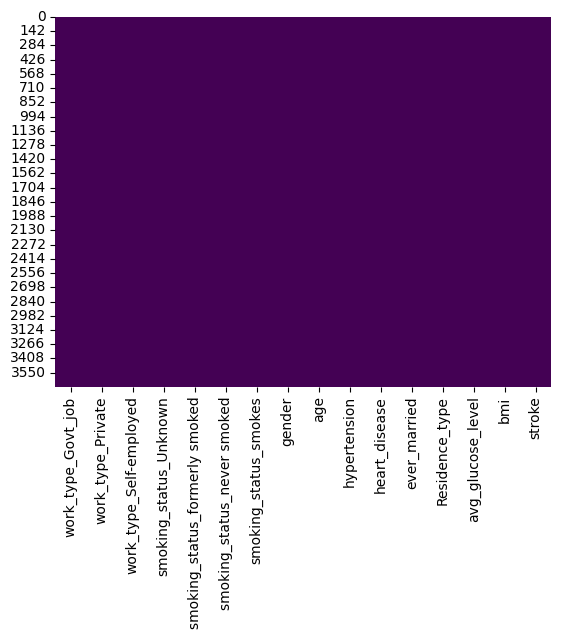

In [249]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

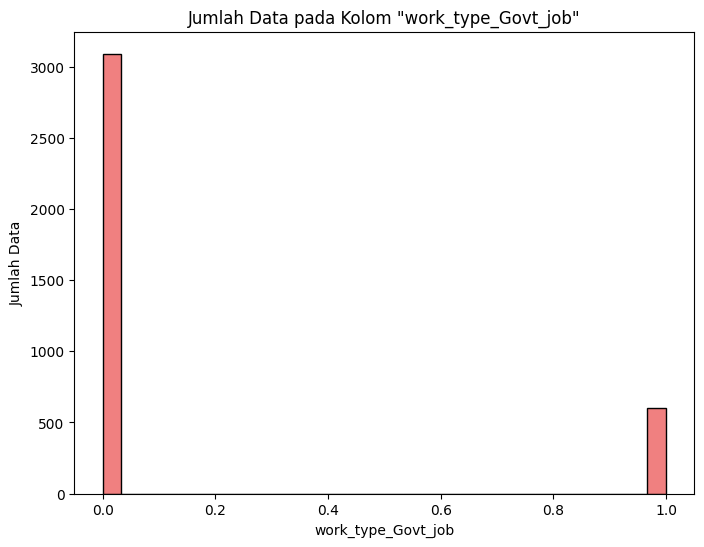

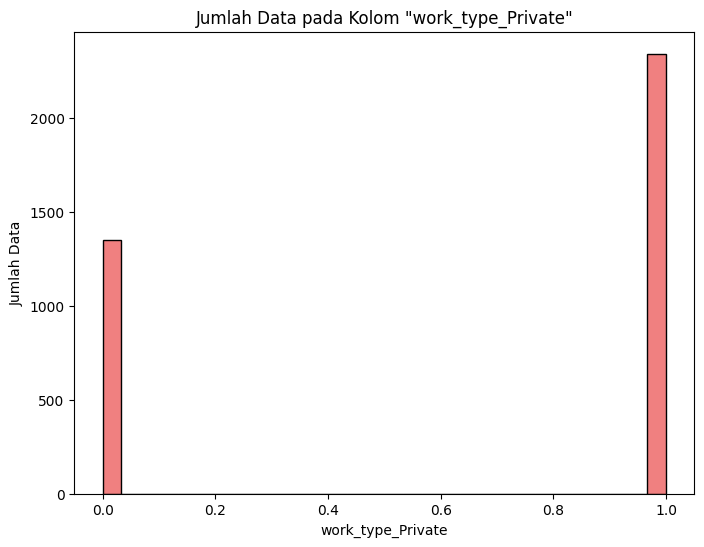

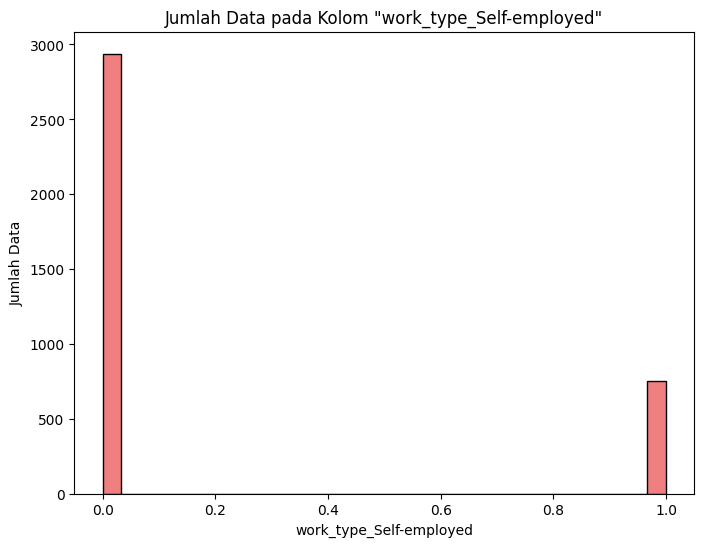

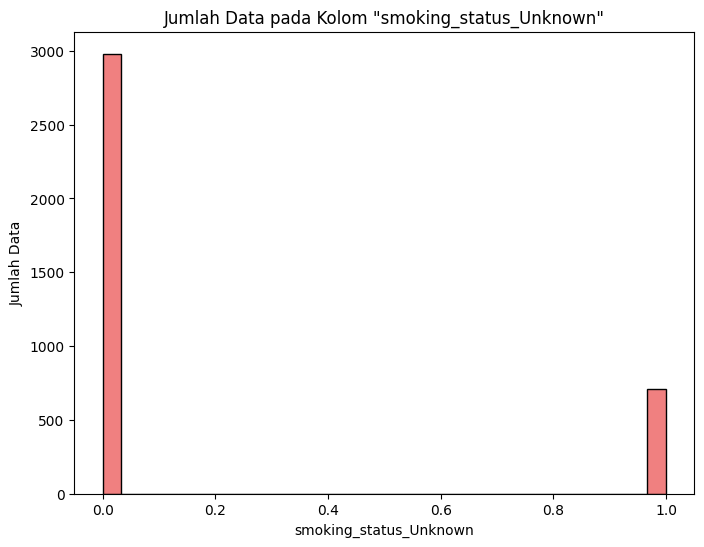

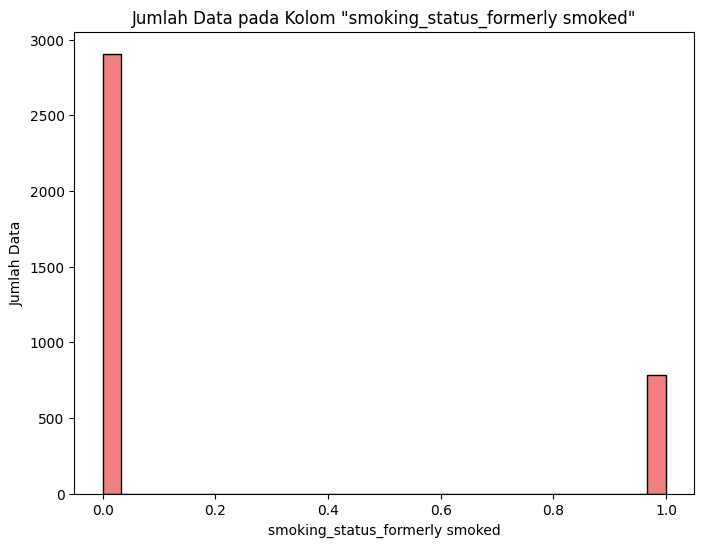

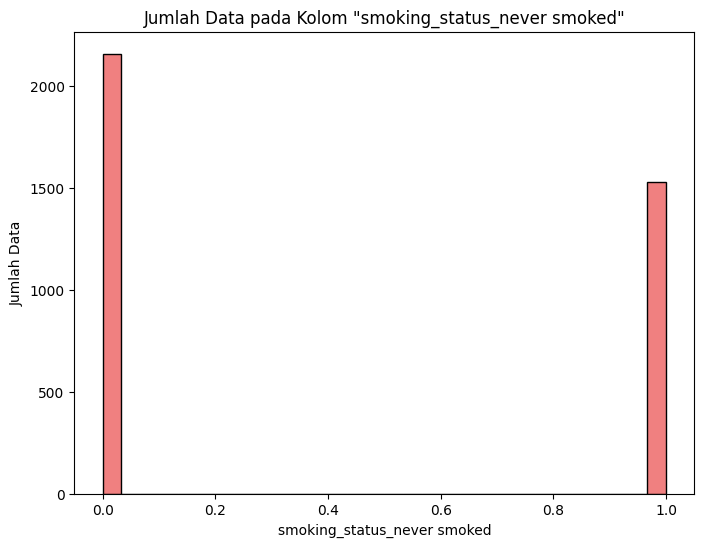

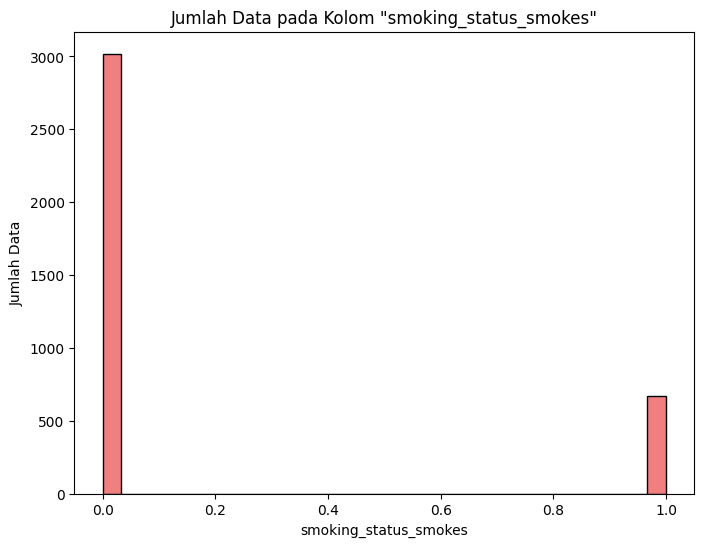

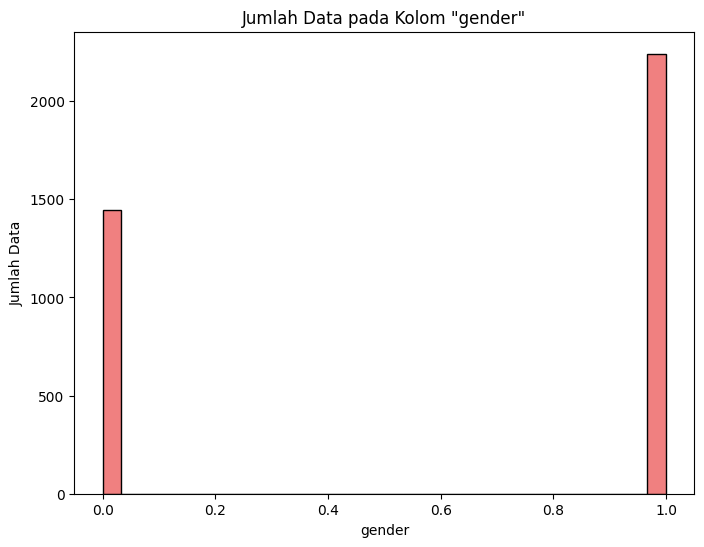

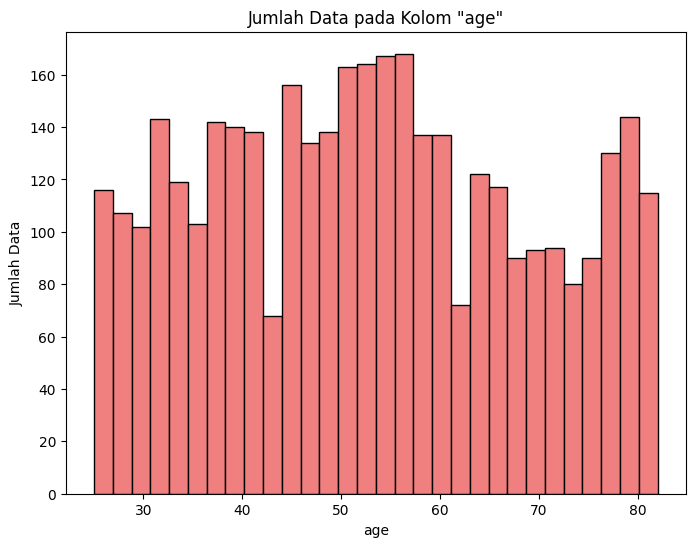

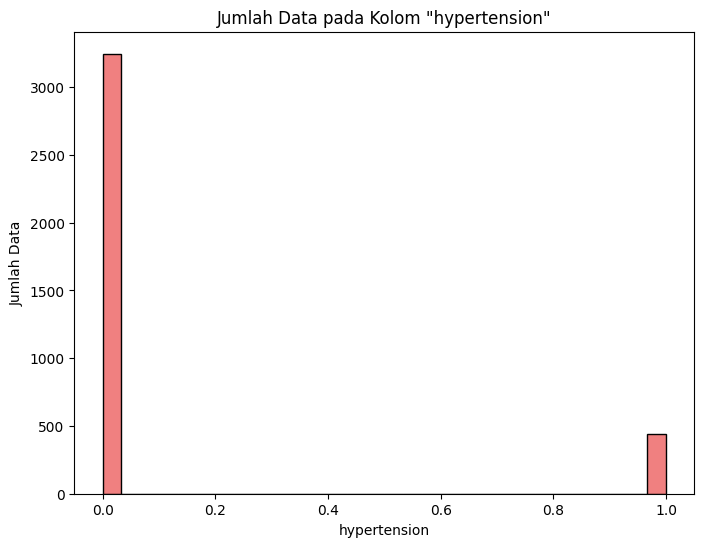

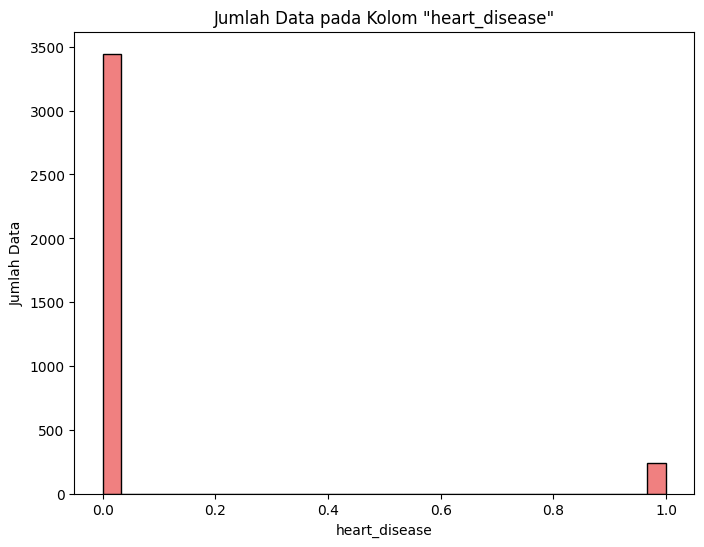

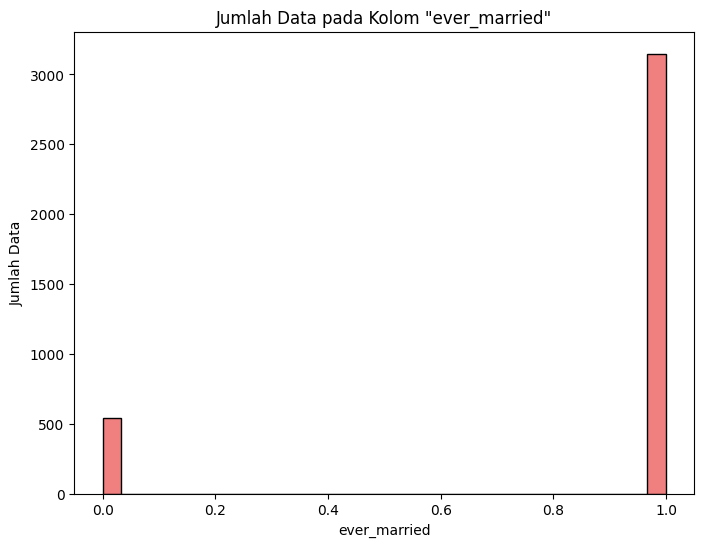

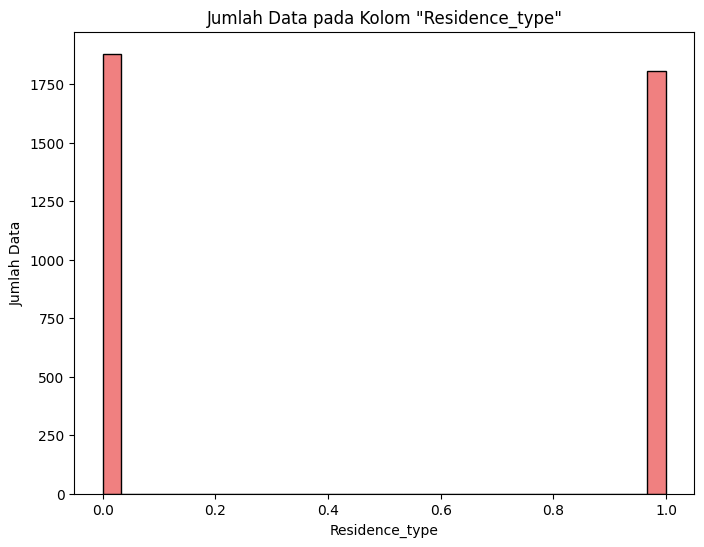

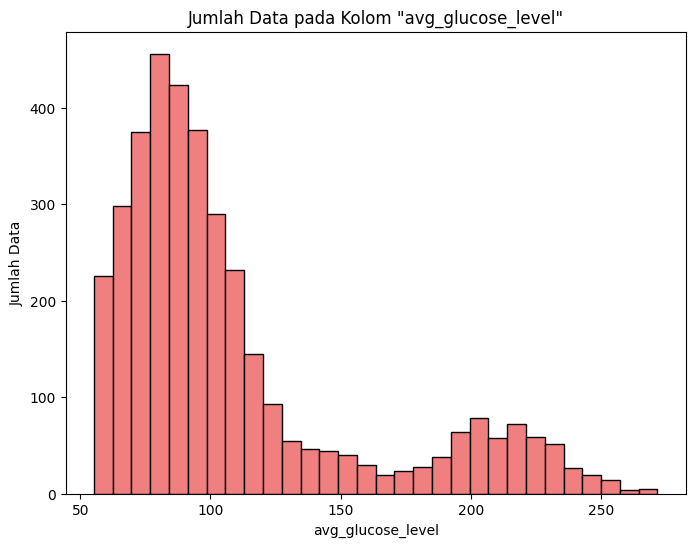

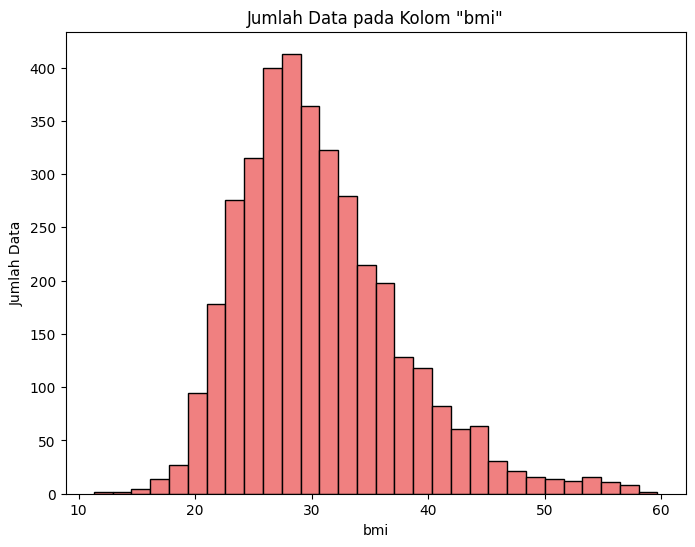

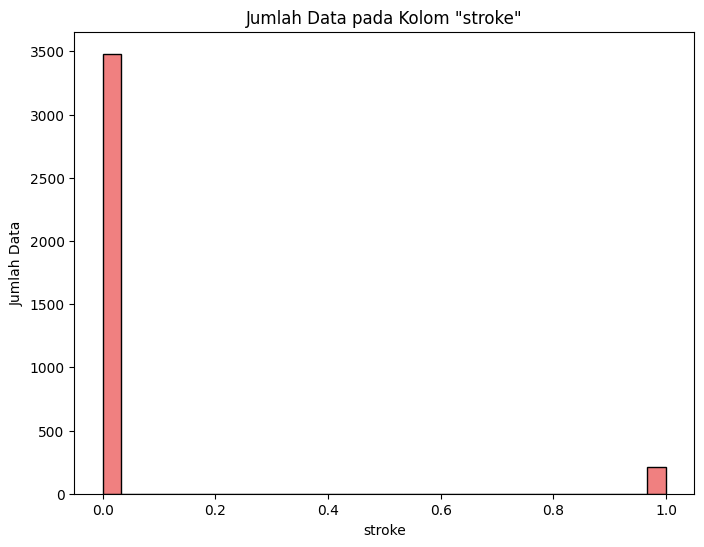

In [250]:
selected_columns = ['work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_Unknown',
                    'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes',
                    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                    'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

In [251]:
df

,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,67.0,0,1,1,0,228.69,36.6,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,80.0,0,1,1,1,105.92,32.5,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,49.0,0,0,1,0,171.23,34.4,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,79.0,1,0,1,1,174.12,24.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,81.0,0,0,1,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,57.0,0,0,1,1,77.93,21.7,0
3685,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,81.0,0,0,1,0,125.20,40.0,0
3686,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,35.0,0,0,1,1,82.99,30.6,0
3687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,51.0,0,0,1,1,166.29,25.6,0


In [252]:
print(df.dtypes)

work_type_Govt_job                float64
work_type_Private                 float64
work_type_Self-employed           float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
dtype: object


In [253]:
# Mengubah tipe data float64 menjadi int64 kecuali avg_glucose_level dan bmi
for column in df.columns:
    if df[column].dtype == float and column not in ['avg_glucose_level', 'bmi']:
        df[column] = df[column].astype(int)

In [254]:
print(df.dtypes)

work_type_Govt_job                  int32
work_type_Private                   int32
work_type_Self-employed             int32
smoking_status_Unknown              int32
smoking_status_formerly smoked      int32
smoking_status_never smoked         int32
smoking_status_smokes               int32
gender                              int64
age                                 int32
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
dtype: object


In [255]:
df

,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,0,67,0,1,1,0,228.69,36.6,1
1,0,1,0,0,0,1,0,0,80,0,1,1,1,105.92,32.5,1
2,0,1,0,0,0,0,1,1,49,0,0,1,0,171.23,34.4,1
3,0,0,1,0,0,1,0,1,79,1,0,1,1,174.12,24.0,1
4,0,1,0,0,1,0,0,0,81,0,0,1,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0,1,0,0,0,1,0,1,57,0,0,1,1,77.93,21.7,0
3685,0,0,1,0,0,1,0,1,81,0,0,1,0,125.20,40.0,0
3686,0,0,1,0,0,1,0,1,35,0,0,1,1,82.99,30.6,0
3687,0,1,0,0,1,0,0,0,51,0,0,1,1,166.29,25.6,0


In [256]:
# Simpan DataFrame ke dalam file CSV dengan format desimal yang benar
df.to_csv('hasil_awal_onehot.csv', index=False, float_format='%.2f', decimal=',')

# Pindahkan file ke direktori yang diinginkan
shutil.move('hasil_awal_onehot.csv', 'D:\\Tugas Akhir\\Stroke\\hasil_awal_onehot.csv')


'D:\\Tugas Akhir\\Stroke\\hasil_awal_onehot.csv'

In [257]:
x = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Simpan data latih dan uji ke dalam file CSV dengan format yang sama
X_train.assign(stroke=y_train).to_csv('data_train.csv', index=False, float_format='%.2f', decimal=',')
X_test.assign(stroke=y_test).to_csv('data_test.csv', index=False, float_format='%.2f', decimal=',')
# Pindahkan file CSV ke direktori tertentu (gunakan shutil)
shutil.copyfile('data_train.csv', 'D:\Tugas Akhir\Stroke\data_train.csv')
shutil.copyfile('data_test.csv', 'D:\Tugas Akhir\Stroke\data_test.csv')

'D:\\Tugas Akhir\\Stroke\\data_test.csv'

In [258]:
file_path = 'D:\Tugas Akhir\Stroke\data_train.csv'
df = pd.read_csv(file_path)

x = df.drop('stroke', axis=1)
y = df['stroke']


# Ganti koma dengan titik dalam kolom numerik
numeric_columns = ['avg_glucose_level', 'bmi']  # Sesuaikan dengan nama kolom numerik Anda
x[numeric_columns] = x[numeric_columns].replace({',': '.'}, regex=True)

In [259]:
#Standarisasi data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Buat DataFrame baru untuk menampilkan hasil standarisasi
df_scaled = pd.DataFrame(data=x_scaled, columns=x.columns)

print("Statistik Ringkasan Data Setelah Standarisasi:")
print(df_scaled.describe())

# Tampilkan hasil standarisasi
print("Data Asli:")
print(x)
print("\nData Setelah Standarisasi:")
print(df_scaled)

Statistik Ringkasan Data Setelah Standarisasi:
       work_type_Govt_job  work_type_Private  work_type_Self-employed  \
count        2.951000e+03       2.951000e+03             2.951000e+03   
mean        -4.454436e-17       6.019508e-17            -3.310729e-17   
std          1.000169e+00       1.000169e+00             1.000169e+00   
min         -4.341448e-01      -1.329772e+00            -5.041266e-01   
25%         -4.341448e-01      -1.329772e+00            -5.041266e-01   
50%         -4.341448e-01       7.520088e-01            -5.041266e-01   
75%         -4.341448e-01       7.520088e-01            -5.041266e-01   
max          2.303379e+00       7.520088e-01             1.983629e+00   

       smoking_status_Unknown  smoking_status_formerly smoked  \
count            2.951000e+03                    2.951000e+03   
mean            -1.685462e-17                   -2.889364e-17   
std              1.000169e+00                    1.000169e+00   
min             -4.860863e-01      

Explained Variance Ratio:
[0.13739566 0.10777539]

Principal Components:
[[ 0.17611323 -0.52110939  0.46268778 -0.08972461  0.20075159 -0.03264001
  -0.07949462 -0.06656294  0.46231967  0.24510932  0.23382652  0.18595095
  -0.00684081  0.24344506  0.02826858]
 [-0.3744634   0.43640479 -0.18121173  0.02513722  0.35726902 -0.41329657
   0.12328354 -0.25744892  0.18986177  0.18509167  0.246854    0.12710465
  -0.00985257  0.27639129  0.178987  ]]


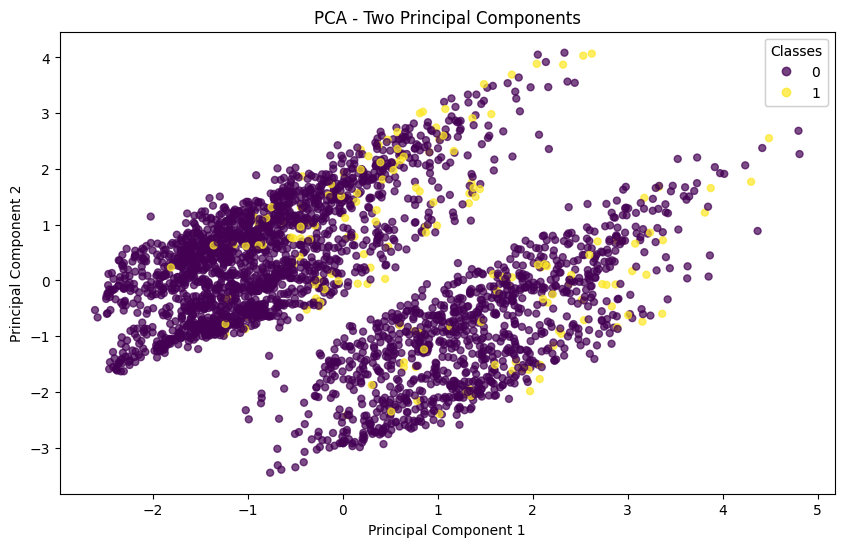

In [268]:
# Lakukan PCA
n_components = 2  # Ganti dengan jumlah komponen utama yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x_scaled)

# Tampilkan explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Tampilkan komponen utama
print("\nPrincipal Components:")
print(pca.components_)

# Tampilkan hasil transformasi PCA
df_pca_result = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_result['stroke'] = y  # Tambahkan kolom target ke hasil PCA
df_pca_result.head()

# Plot hasil PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca_result['Principal Component 1'], df_pca_result['Principal Component 2'], c=df_pca_result['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.title('PCA - Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Variance Ratio:
[0.13739603 0.10777922 0.10144691]


c:\Users\avill\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


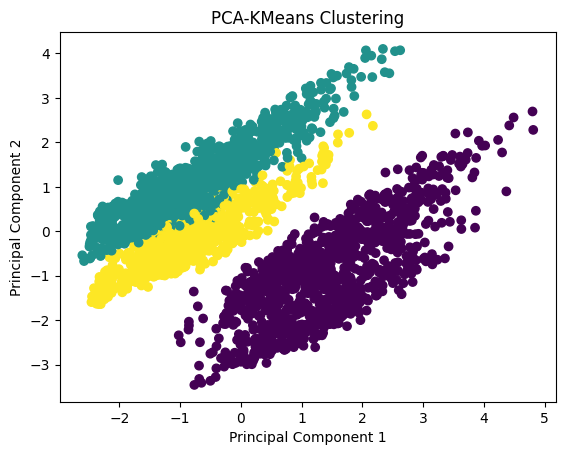

In [261]:
# Tampilkan variance ratio untuk melihat seberapa banyak varians yang dijelaskan oleh setiap komponen utama
print("Variance Ratio:")
print(pca.explained_variance_ratio_)

# Lakukan K-Means clustering
n_clusters = 3  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Tampilkan hasil clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('PCA-KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()